<a href="https://colab.research.google.com/github/JayNguyen-123/Fashion_MNIST_Classification_in_Pytorch/blob/main/Fashion_MNIST_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Image Classification with Fashion MNIST Dataset using Pytorch

In [ ]:
import torch
from  torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


In [ ]:
batch_size = 64

# create data loader
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
  print(f'Shape of X[N, C, H, W]: {X.shape}')
  print(f"Shape of y: {y.shape} {y.dtype}")
  break



Shape of X[N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


### Creating Models

In [ ]:
# get cpu, gpu or mps(mps for Mac) device for training
device = (
    "cuda" if torch.cuda.is_available() else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")


Using cpu device


In [ ]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)



NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Optimizing the Model Parameters
- To train a model, we need a loss fuction and an optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")



### Training Model


In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 2.316469  [   64/60000]
loss: 2.297386  [ 6464/60000]
loss: 2.279929  [12864/60000]
loss: 2.263461  [19264/60000]
loss: 2.248667  [25664/60000]
loss: 2.227863  [32064/60000]
loss: 2.233147  [38464/60000]
loss: 2.200390  [44864/60000]
loss: 2.195307  [51264/60000]
loss: 2.157741  [57664/60000]
Test Error: 
 Accuracy: 35.8%, Avg loss: 2.150031 

Epoch 2
-------------------------------
loss: 2.168765  [   64/60000]
loss: 2.152869  [ 6464/60000]
loss: 2.096588  [12864/60000]
loss: 2.100181  [19264/60000]
loss: 2.047860  [25664/60000]
loss: 1.998137  [32064/60000]
loss: 2.022076  [38464/60000]
loss: 1.944177  [44864/60000]
loss: 1.946127  [51264/60000]
loss: 1.863255  [57664/60000]
Test Error: 
 Accuracy: 49.4%, Avg loss: 1.863500 

Epoch 3
-------------------------------
loss: 1.906796  [   64/60000]
loss: 1.869892  [ 6464/60000]
loss: 1.756194  [12864/60000]
loss: 1.780763  [19264/60000]
loss: 1.668145  [25664/60000]
loss: 1.635105  [32064/600

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Save Pytorch Model state to model.pth")


Save Pytorch Model state to model.pth


### Loading Models
- The process for loading a model includes re-creating the model structure and loading the state dictionanry into it


In [ ]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True))


<All keys matched successfully>

### Making Predictions


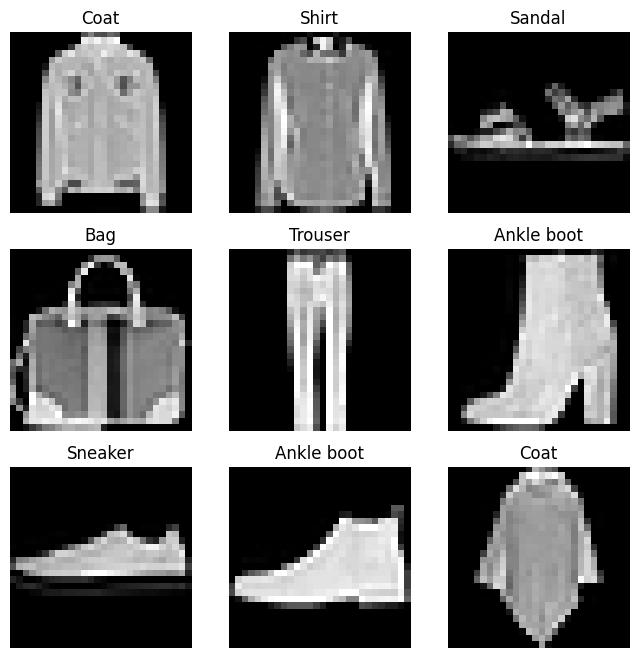

In [ ]:
import matplotlib.pyplot as plt

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(classes[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()





In [ ]:
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
